In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.dtype

dtype('uint8')

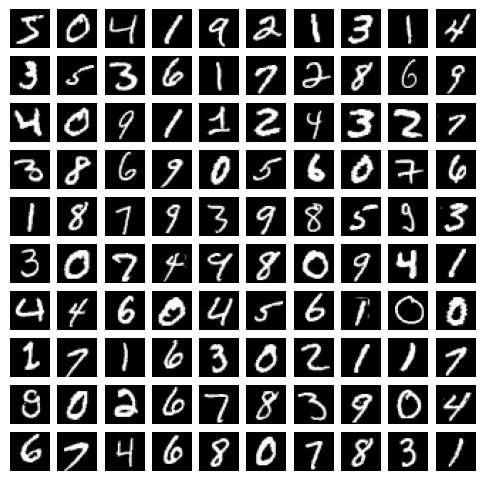

In [ ]:
n=100
plt.figure(figsize=(6,6))
for i in range(n):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('off')
plt.show()

In [ ]:
# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train_re = x_train.reshape(-1, 784)
x_test_re = x_test.reshape(-1, 784)

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train_re.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# Build a fully connected DNN model with regularization and dropout
model =Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



In [ ]:
# Train the model
history = model.fit(x_train_re, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stop],
                    verbose=1)




Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7868 - loss: 1.3427 - val_accuracy: 0.9677 - val_loss: 0.4535
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9420 - loss: 0.5057 - val_accuracy: 0.9682 - val_loss: 0.3469
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9501 - loss: 0.4064 - val_accuracy: 0.9672 - val_loss: 0.3222
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9528 - loss: 0.3748 - val_accuracy: 0.9743 - val_loss: 0.2869
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9569 - loss: 0.3529 - val_accuracy: 0.9748 - val_loss: 0.2792
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9559 - loss: 0.3440 - val_accuracy: 0.9748 - val_loss: 0.2743
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9567 - loss: 0.3412 - val_accuracy: 0.9758 - val_loss: 0.2693
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9565 - loss: 0.3323 - 

In [ ]:
# Evaluate on test set
loss, acc = model.evaluate(x_test_re, y_test_cat)
print(f"Test Accuracy: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9641 - loss: 0.2957
Test Accuracy: 0.9696


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9641 - loss: 0.2957
Test Accuracy: 0.9696


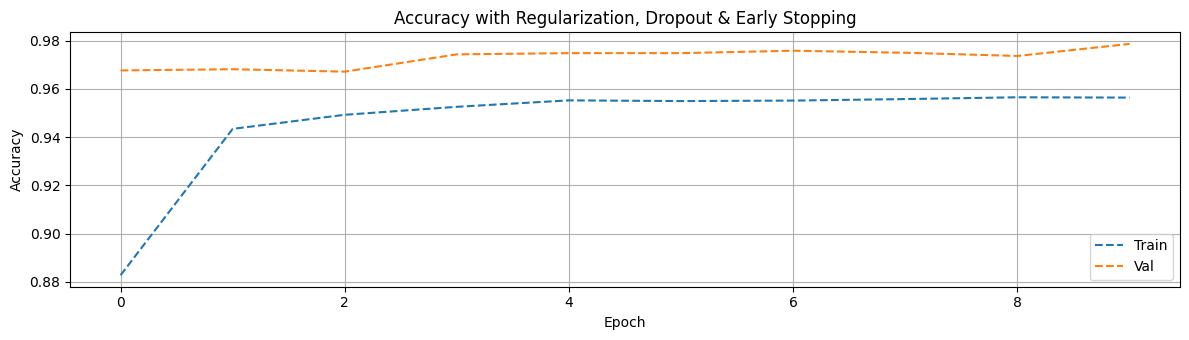

In [ ]:
# Plot training history
plt.figure(figsize=(12,3.5))
plt.plot(history.history['accuracy'], label='Train',ls='--')
plt.plot(history.history['val_accuracy'], label='Val',ls='--')
plt.legend()
plt.title('Accuracy with Regularization, Dropout & Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


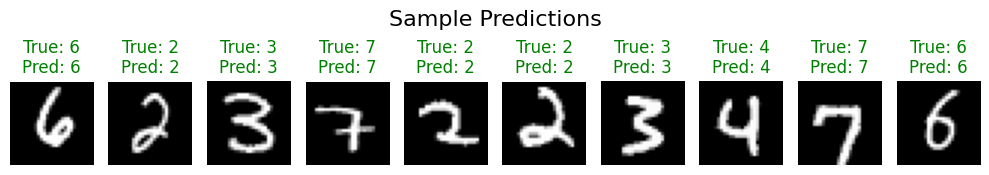

In [ ]:
# Select random samples from the test set
num_samples = 10
np.random.seed(42)
random_indices = np.random.choice(len(x_test), size=num_samples, replace=False)

# Extract selected images and labels
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

# Predict using the trained model
predictions = model.predict(sample_images.reshape((-1,784)))
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with predictions
plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    color = 'green' if predicted_labels[i] == sample_labels[i] else 'red'
    plt.title(f"True: {sample_labels[i]}\nPred: {predicted_labels[i]}", color=color)
plt.suptitle("Sample Predictions", fontsize=16)
plt.tight_layout()
plt.show()
